In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [10]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

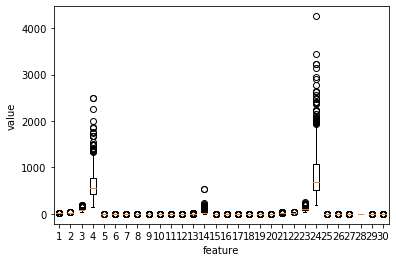

In [11]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [12]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [13]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [14]:
x = cancer.data
y = cancer.target

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
# stratify=y : 데이터를 나눌 때 비율을 동일하게 만듬, 비율이 불균형한 경우 y로 지정
# test_size=0.2 : 데이터 나누는 비율 조정(기본값은 75:25)
# random_state = 42 : 결과 일정하게 하기 위해 난수 초깃값 지정(실전에선 사용 X)

In [16]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [17]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

364 91


['mean perimeter' 'mean area']


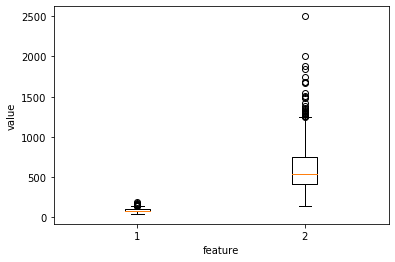

In [19]:
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [20]:
train_mean = np.mean(x_train, axis=0) # 평균 계산, axis를 0으로 지정하면 2차원 배열 열을 기준으로 통계치를 계산하여 하나의 행 벡터로 반환
train_std = np.std(x_train, axis=0) # 표준편차 계산
x_train_scaled = (x_train - train_mean) / train_std # train set 표준화 : (특성값 - 평균)/표준편차

In [11]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None
        self.b = None
        # 데이터의 특성이 많아 가중치를 초기화하지 않음
        self.losses = [] # 손실 함수의 결과값 저장할 리스트 생성
        self.val_losses = [] # 검증 세트에 대한 손실 저장할 리스트 생성
        self.w_history = [] # fit() 메소드에서 가중치가 바뀔 때 마다 가중치 기록할 배열 생성
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b # 직선 방정식 계산
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def add_bias(self, x):
        return np.c_[np.ones((x.shape[0], 1)), x] # 행렬의 맨 앞에 1로 채워진 열 벡터를 추가
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z)) # 시그모이드 계산, np.exp() 함수는 자연 상수의 지수 함수를 계산
        return a
    
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
        # L1 규제 + L2 규제를 리턴
    
    # 검증 세트에 대한 손실 함수 값 계산
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i]) # 정방향 계산
            a = self.activation(z) # 활성화 함수 적용
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())
    
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1]) # 가중치를 초기화, np.ones() 함수는 입력된 매개변수와 동일한 크기의 배열을 만들고 값을 1로 채움
        self.b = 0
        self.w_history.append(self.w.copy()) # 가중치 기록
        np.random.seed(42) # 임의의 시작 값 지정
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞음
            for i in indexes:
                z = self.forpass(x[i]) # 정방향 계산
                a = self.activation(z) # 활성화 함수
                err = -(y[i] - a) # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w # 그레디언트에 페널티 항의 미분값 더함
                self.w -= self.lr * w_grad # 가중치 업데이트
                self.b -= b_grad # 절편 업데이트
                self.w_history.append(self.w.copy()) # self.w의 값이 바뀔 때마다 w_history 리스트에 복사하여 추가
                a = np.clip(a, 1e-10, 1-1e-10) # 안전한 로그 계산을 위해 클리핑, np.clip() 함수로 범위 지정
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) # 손실 누적
            self.losses.append(loss/len(y) + self.reg_loss()) # 에포크마다 평균 손실 저장
            self.update_val_loss(x_val, y_val) # 에포크마다 검증 세트에 대한 손실 저장
            
    # 새로운 샘플에 대한 예측값을 계산해 주는 메소드
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x] # 정방향 계산
        return np.array(z) > 0 # 계단함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [24]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_val, y_val)

C:\Users\ktkim\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp


0.9120879120879121

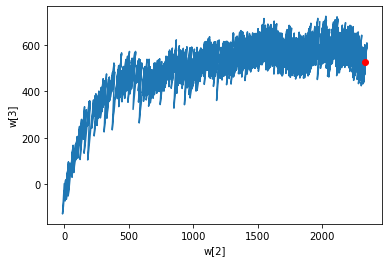

In [25]:
w2 = []
w3 = []
for w in layer.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

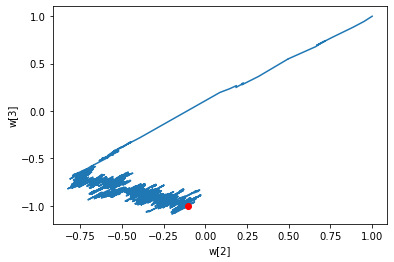

In [26]:
layer1 = SingleLayer()
layer1.fit(x_train_scaled, y_train)
w2 = [] # 3번째 요소 가중치 배열 생성
w3 = [] # 4번째 요소 가중치 배열 생성
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [27]:
layer1.score(x_val, y_val)

0.37362637362637363

In [61]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
layer1.score(x_val_scaled, y_val)

0.967032967032967

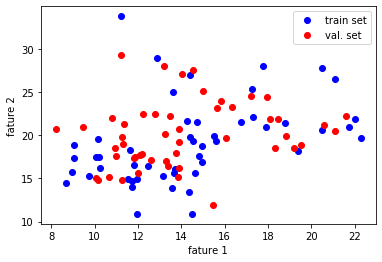

In [62]:
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

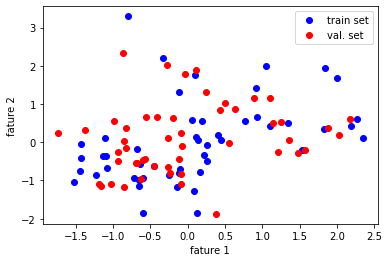

In [64]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

훈련 세트와 검증 세트를 각각 다른 비율로 전처리 했기 때문에 두 산점도의 차이 발생.

훈련 세트의 평균, 표준 편차를 사용하여 검증 세트를 변환 ㄱㄱ

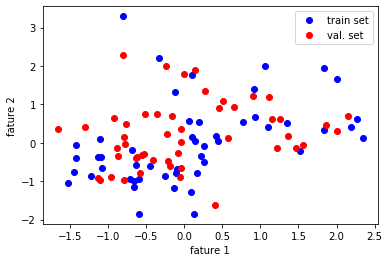

In [65]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [66]:
layer1.score(x_val_scaled, y_val)

0.967032967032967

# * Regularization(overfitting)

In [71]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

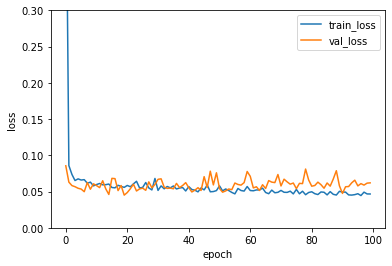

In [72]:
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

검증 손실이 대략 20번째 에포크 이후에 훈련 세트보다 높아짐.
(20번의 에포크 이후에는 훈련할 필요 없음)

In [73]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, epochs=20)
layer3.score(x_val_scaled, y_val)

0.978021978021978

검증 세트의 성능이 조금 더 향상됨

# * L1 regularization

In [28]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std

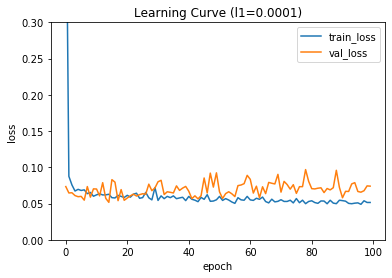

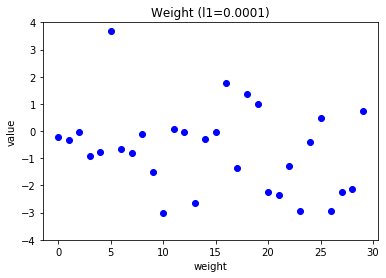

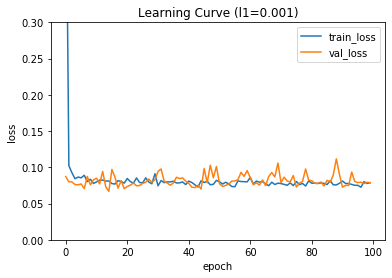

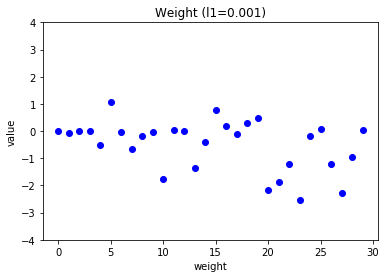

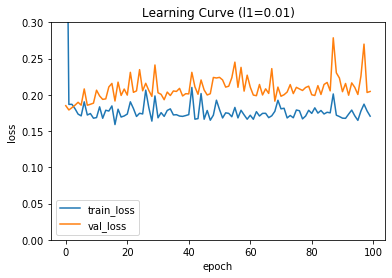

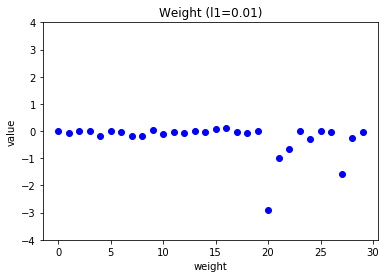

In [29]:
l1_list = [0.0001, 0.001, 0.01] # 규제 강도

# 각 강도별 하이퍼파라미터로 모델을 만들어서 학습 곡선과 가중치를 그래프로 나타냄
for l1 in l1_list:
    lyr = SingleLayer(l1=l1)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l1={})'.format(l1))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l1={})'.format(l1))
    plt.xlabel('weight')
    plt.ylabel('value')
    plt.ylim(-4, 4)
    plt.show()

In [30]:
layer5 = SingleLayer(l1=0.001)
layer5.fit(x_train_scaled, y_train, epochs=20)
layer5.score(x_val_scaled, y_val)

0.978021978021978

# * L2 regularization

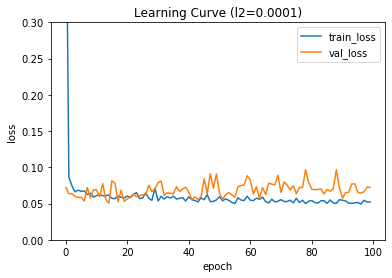

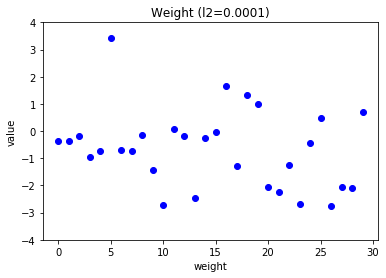

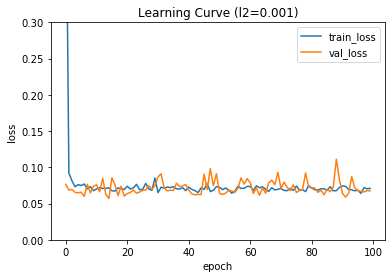

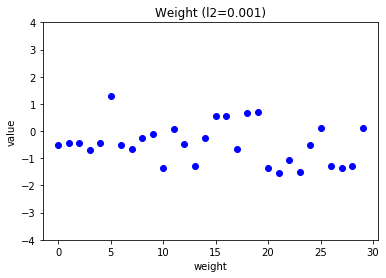

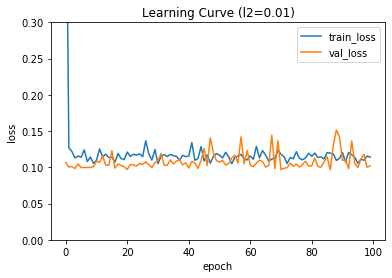

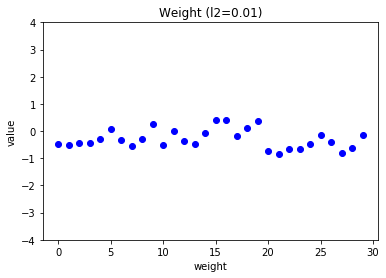

In [31]:
l2_list = [0.0001, 0.001, 0.01] # 규제 강도

# 각 강도별 하이퍼파라미터로 모델을 만들어서 학습 곡선과 가중치를 그래프로 나타냄
for l2 in l2_list:
    lyr = SingleLayer(l2=l2)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l2={})'.format(l2))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l2={})'.format(l2))
    plt.xlabel('weight')
    plt.ylabel('value')
    plt.ylim(-4, 4)
    plt.show()

In [32]:
layer6 = SingleLayer(l1=0.001)
layer6.fit(x_train_scaled, y_train, epochs=50)
layer6.score(x_val_scaled, y_val)

0.967032967032967

In [33]:
np.sum(layer6.predict(x_val_scaled) == y_val)

88

# * Cross validation

In [16]:
validation_scores = [] # 각 폴드의 검증 점수를 저장하기 위한 리스트 정의

In [17]:
k = 10
bins = len(x_train) // k # 샘플 개수 / 폴드 개수 = 한 폴드에 들어갈 샘플의 개수

for i in range(k):
    start = i*bins # 검증 폴드 샘플의 시작 인덱스
    end = (i+1)*bins # 검증 폴드 샘플의 끝 인덱스
    val_fold = x_train[start:end]
    val_target = y_train[start:end]
    
    train_index = list(range(0, start))+list(range(end, len(x_train))) # 훈련 폴드의 인덱스 저장
    train_fold = x_train[train_index]
    train_target = y_train[train_index]
    
    # 훈련 데이터의 표준화 전처리를 폴드 나눈 후에 수행
    train_mean = np.mean(train_fold, axis=0) # 평균 계산
    train_std = np.std(train_fold, axis=0) # 표준편차 계산
    train_fold_scaled = (train_fold - train_mean) / train_std # 훈련 데이터 표준화
    val_fold_scaled = (val_fold - train_mean) / train_std # 검증 데이터 표준화
    
    lyr = SingleLayer(l2=0.01)
    lyr.fit(train_fold_scaled, train_target, epochs=50)
    score = lyr.score(val_fold_scaled, val_target)
    validation_scores.append(score) # 반복문을 진행하며 10개의 검증 폴드로 측정한 성능 점수 저장
    
print(np.mean(validation_scores))

0.9711111111111113
